# Homework #5: Runge-Kutta Methods
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/27/2020|

In this notebook, we will use a _Runge-Kutta_ method to predict the orbit of a binary star system with two equal masses and observe its evolution for 100 orbits. The mass of each star is such that its _standard gravitational parameter_ $\mu_i = GM_i = 1, i=1,2$, and they are initially separated by a distance of $1$.

## 1. Runge–Kutta Fourth-Order Method (RK4)

Newton's second law provides us with an ordinary differential equation (ODE) to describe the motion of a particle under the influence of forces&mdash;in our case a conserved, _central force_. In order to numerically solve, or _integrate_, this differential equation, the Runge-Kutta approach starts with the formal integral:


\begin{align}
\dfrac{d\mathbf{y}}{dt} &= \mathbf{f}(t, \mathbf{y})\\
{\bf y}(t) &= \int {\bf f}(t,\mathbf{y})dt,
\tag{1}
\end{align}

where $\mathbf{y}$ is an $N$-dimensional vector of $N$ unknowns, and $\mathbf{f}$ is any function (sometimes called "force" function) in terms of a single, independent variable $t$, and dependent unknowns $y^{(i)}$, but none of their derivatives. If $\mathbf{y_n}$ represents the values of the system at an instant in time, and $\mathbf{y_{n+1}}$ at some interval timestep forward, then

\begin{equation}
{\bf y}_{n+1}={\bf y}_{n}+\int_{t_{n}}^{t_{n+1}}{\bf f}(t,\mathbf{y})dt.
\tag{2}
\end{equation}

If we expand $\mathbf{f}(t,\mathbf{y})$ by Taylor series about the _midpoint_ of the integration interval (i.e., halfway between $n$ and $n+1$), and keep only two terms, we find

\begin{equation}
\mathbf{f}(t,y) \approx \mathbf{f}(t_{n+1/2}, \mathbf{y}_{n+1/2}) + (t-t_{n+1/2})\dfrac{d\mathbf{f}}{dt}t_{n+1/2} + \mathcal{O}(h^2),
\tag{3}
\end{equation}

where the remaining error due to this approximation is on the order of $h^2$, i.e., $\mathcal{O}(h^2$). But the odd-powered terms of $(t-t_{n+1/2})$ in the expansion represent _odd functions_. And thus evaluating this back in our integral in Eq. 2, over symmetric bounds, all these terms vanish to zero, leaving

\begin{equation}
\int_{t_{n}}^{t_{n+1}}{\bf f}(t,\mathbf{y})dt \approx \mathbf{f}(t_{n+1/2}, \mathbf{y}_{n+1/2})h + \mathcal{O}(h^3),
\tag{4}
\end{equation}

and Eq. 2 becomes

\begin{equation}
{\bf y}_{n+1} \approx {\bf y}_{n}+{\bf f}(t_{n+1/2},\mathbf{y}_{n+1/2})h + O(h^3)
\tag{5}
\end{equation}

which is the _second-order_ Runge-Kutta algorithm (RK2). Using the forward-difference Euler method to approximate $\mathbf{y}_{n+1/2}$,

\begin{equation}
\mathbf{y}_{n+1/2} \approx \mathbf{y}_n + \dfrac{1}{2}h\dfrac{d\mathbf{y}}{dt} = \mathbf{y}_n + \dfrac{1}{2}h\mathbf{f}(t_n, \mathbf{y}_n).
\tag{6}
\end{equation}

Rewriting Eq. 5, the complete version becomes

\begin{eqnarray}
{\bf y}_{n+1} &\approx &{\bf y}_{n}+{\mathbf{k}_{2}}\\
{\mathbf{k}_{2}} & =&h {\bf f}(t_{n}+\dfrac{h}{2},{\bf y}_{n}+\frac{{\mathbf{k}_{1}}}{2}),\qquad {\mathbf{k}}_{1}=h{\bf f}(t_n,{\bf y}_{n}).
\tag{7}
\end{eqnarray}

If we expand the Taylor series of Eq. 3 out to $h^2$, we would again find lower-order cancellation around the interval midpoint, yielding an approximation error of $\mathcal{O}(h^4)$. The result of the _fourth-order_ Runge-Kutta method (RK4) is

\begin{equation}
\mathbf{y}_{n+1} \approx \mathbf{y}_n + \dfrac{1}{6}(\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4)
\tag{8}
\end{equation}

\begin{align*}
\mathbf{k}_1 &= h\mathbf{f}(t_n, \mathbf{y}_n), &
\mathbf{k}_2 &= h \mathbf{f}\left(t_n + \dfrac{h}{2}, \mathbf{y}_n + \dfrac{\mathbf{k}_1}{2}\right),\\
\mathbf{k}_3 &= h \mathbf{f}\left(t_n + \dfrac{h}{2}, \mathbf{y}_n + \dfrac{\mathbf{k}_2}{2}\right), &
\mathbf{k}_4 &= h\mathbf{f}(t_n + h, \mathbf{y}_n + \mathbf{k}_3).
\end{align*}

In [1]:
def rk4(t, h, y, f):
    """
    Returns the value of state vector y after a single 
    integration interval step h, using the fourth-order
    Runge-Kutta method (see Eq. 8.).
    
    Parameters
    ----------
    t : float
        Independent variable (typically time)
    h : float
        Integration interval step (typically timestep)
    y : array_like
        N-dimensional vector of N unknowns.
    f : function
        N-dimensional vector of force functions f(t, y)
        containing no derivatives of its terms.
    """
    k1 = h*f(t, y)
    k2 = h*f(t + 0.5*h, y + 0.5*k1)
    k3 = h*f(t + 0.5*h, y + 0.5*k2)
    k4 = h*f(t + h, y + k3)
    y += (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
    return y

## 2. The Kepler Problem

The case of two binary stars orbiting each other is an example of the _Kepler problem_, a special case of the _two-body problem_, strictly involving interactions with a _central force_ $F$ proportional to the inverse square of their separation $r$. Applying Newton's _second law_ to two masses,

\begin{align}
\mathbf{f}_{12}(\mathbf{x}_1, \mathbf{x}_2) &= M_1\dfrac{d^2\mathbf{x}_1}{dt^2}\\
\mathbf{f}_{21}(\mathbf{x}_1, \mathbf{x}_2) &= M_2\dfrac{d^2\mathbf{x}_2}{dt^2},
\tag{9}
\end{align}

where $\mathbf{f}_{12}$ is the force on $M_1$ from $M_2$, and vice versa for $\mathbf{f}_{21}$. For a gravitational central force,

\begin{equation}
\mathbf{f}_{12}(\mathbf{x}_1, \mathbf{x}_2) = -\dfrac{GM_1M_2}{r^3}\mathbf{r},
\tag{10}
\end{equation}

where,

\begin{equation}
\mathbf{r} = \mathbf{x}_1 - \mathbf{x}_2
\tag{11}
\end{equation}

is defined as the _displacement vector_, from $M_2$ to $M_1$ (see Fig. 1 below).
<img src="two-body.jpg">
<h3 style="text-align: center;">Figure 1.</h3>

If we use this same displacement vector, by invoking Newton's third law, namely $\mathbf{f}_{12} = -\mathbf{f}_{21}$, we also find

\begin{equation}
\mathbf{f}_{21}(\mathbf{x}_1, \mathbf{x}_2) = \dfrac{GM_1M_2}{r^3}\mathbf{r}.
\tag{12}
\end{equation}

Decomposing these ODEs into a standard form of simultaneous, first-order ODEs (Eq. 1), our final set of "force," or derivative, functions becomes

\begin{align}
\dfrac{dx_1}{dt} &= v_{x_1}\\
\dfrac{dv_{x_1}}{dt} &= -\dfrac{GM_2}{r^3}r_x\\
\dfrac{dy_1}{dt} &= v_{y_1}\\
\dfrac{dv_{y_1}}{dt} &= -\dfrac{GM_2}{r^3}r_y\\
\dfrac{dx_2}{dt} &= v_{x_2}\\
\dfrac{dv_{x_2}}{dt} &= \dfrac{GM_1}{r^3}r_x\\
\dfrac{dy_2}{dt} &= v_{y_2}\\
\dfrac{dv_{y_2}}{dt} &= \dfrac{GM_1}{r^3}r_y,
\tag{13}
\end{align}

where $r_x$ and $r_y$ are the $x$- and $y$-components of the displacement vector $\mathbf{r}$ (Eq. 11). We can now define a function to encapsulate this set of force functions to later be used by our `rk4` method.

In [2]:
import numpy as np

def f(t, y):
    """
    Returns force (derivative) functions in terms of time and
    dependent unknowns y^i but neither of their derivatives.
    
    Parameters
    ----------
    t : float
        Independent time variable.
    y : array_like
        The position and velocity values in the vector
        format [x_1, v_x_1, y_1, v_y_1,
                x_2, v_x_2, y_2, v_y_2].
    """
    GM = 1.                    # GM_i = 1,    i = 1,2
    rx = y[0] - y[4]           # Displacement vector components
    ry = y[2] - y[6]           # from 2 to 1
    r = np.sqrt(rx**2 + ry**2) # magnitude of DV
    f = np.zeros(8)
    f[0] = y[1]                # dx_1/dt = v_x_1
    f[1] = -GM*rx/r/r/r        # dv_x_1/dt = F12_x = -GMr_x/r^3
    f[2] = y[3]                # dy_1/dt = v_y_1
    f[3] = -GM*ry/r/r/r        # dv_y_1/dt = F12_y = -GMr_y/r^3
    f[4] = y[5]                # dx_2/dt = v_x_2
    f[5] = GM*rx/r/r/r         # dv_x_2/dt = F21_x = -F12_x
    f[6] = y[7]                # dy/dt = v_y
    f[7] = GM*ry/r/r/r         # dv_y_2/dt = F21_y = -F12_y
    return f

## 3. Visualization and Integration

We are now in a position to set our initial conditions, i.e., $\mathbf{y}(t=0) = x_{1_0}, v_{x_{1_0}}, y_{1_0}, v_{y_{1_0}},\dots$, and integrate step by step until some `tmax`. Let's define a function to handle this so we can reuse it multiple times with various initial conditions.

In [3]:
def simulate(tmax, y, f, simnum, t=0., h=0.01, zoom=True):
    """
    Simulates equal-mass, binary star system with initial state
    vector `y` until `tmax`.
    
    Parameters
    ----------
    tmax : float
        Maximum time to integrate until.
    y : array_like
        The position and velocity values in the vector format:
            [x_1, v_x_1, y_1, v_y_1,
             x_2, v_x_2, y_2, v_y_2].
    f : function
        Force (derivative) functions to be evaluated by `rk4`.
    simnum : int
        Arbitrary simulation number to be passed to `OrbitPlot`.
    t : float
        Independent time variable. By default, set to zero.
    h : float
        Integration timestep size. By default, set to 0.01.
    """
    # store positions
    xp1, yp1, xp2, yp2, CMx, CMy = [], [], [], [], [], []
    
    while (t < tmax):                 # integrate until tmax
        CMx.append(0.5*(y[0] + y[4])) # update barycenter
        CMy.append(0.5*(y[2] + y[6]))
        if (t + h) > tmax:            # if last step overshoots
            h = tmax - t              # resize timestep
        y = rk4(t, h, y, f)           # advance state w/ rk4
        xp1.append(y[0])
        yp1.append(y[2])
        xp2.append(y[4])
        yp2.append(y[6])
        t += h                        # advance timestep
    
    OrbitPlot(xp1, yp1, xp2, yp2, CMx, CMy, simnum, zoom)

In the last line of the function, we call a separate method to generate a plot that traces the orbit of the binary system. One thing we'd like to add to that plot is the position of the system's center of mass, or _barycenter_. Referring back to Fig. 1, the position of the barycenter $R$ can be expressed as

\begin{equation}
\mathbf{R} = \dfrac{m_1}{M}\mathbf{x}_1 + \dfrac{m_2}{M}\mathbf{x}_2
\end{equation}

In our case, since $Gm_i=1, i=1,2$, which implies $m_1 = m_2$ and $M = m_1 + m_2 = 2m_1 = 2m_2$, then the position of our binary system's barycenter is simply

\begin{align}
\mathbf{R} &= \dfrac{1}{2}\mathbf{x}_1 + \dfrac{1}{2}\mathbf{x}_2\\
&= \dfrac{1}{2}(\mathbf{x}_1 + \mathbf{x}_2)
\end{align}

Looking back, we see that we calculate the $x$- and $y$-components of the barycenter's position at each timestep and store them in `CMx` and `CMy`, that later gets passed on to `OrbitPlot`.

In [4]:
import matplotlib.pyplot as plt
import warnings

def OrbitPlot(xp1, yp1, xp2, yp2, CMx, CMy, fignum, zoom):
    """
    Plots the orbital traces of each star in the binary system.
    """
    npts = len(xp1)
    title = r'Figure %d. $Orbital \hspace{.5} Trace$'%(fignum)   
    
    plt.figure(figsize=(5, 5))
    plt.title(title, fontsize='xx-large', fontweight='bold')
    plt.xlabel('$x$', fontsize='large')
    plt.ylabel('$y$', fontsize='large')
    plt.grid()
    plt.style.use('dark_background')
    if zoom:
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
    else:
        plt.axes().set_aspect('equal', 'datalim')
    
    # plot positions in segments with increasing alpha (opacity)
    # to give orbital trace a "gradient" or "fading" effect
    for i in range(npts-1):
        plt.plot(xp1[i:i+2], yp1[i:i+2], linewidth=3,
                 color='deepskyblue', alpha=float(i)/(npts-1))
    # plot final position w/ label
    plt.plot(xp1[npts-1], yp1[npts-1], linewidth=3,
             color='deepskyblue', label='$1^{st}$ Orbit')
    for i in range(npts-1):
        plt.plot(xp2[i:i+2], yp2[i:i+2], linewidth=3,
                 color='orange', alpha=float(i)/(npts-1))
    plt.plot(xp2[npts-1], yp2[npts-1], linewidth=3,
             color='orange', label='$2^{nd}$ Orbit')
    plt.plot(CMx, CMy, 'r+', mew=3, markersize='12', label='CM')
    plt.legend(loc="best", fontsize='large')
    warnings.filterwarnings("ignore")
    plt.show()

Now let's run a simulation with the following initial conditions:
- stars are 1 unit apart along the x-axis, centered at the origin
- stars have initial velocities of $1/\sqrt2$ along the y-axis and in opposite directions
- integrate for 2.2 units of time

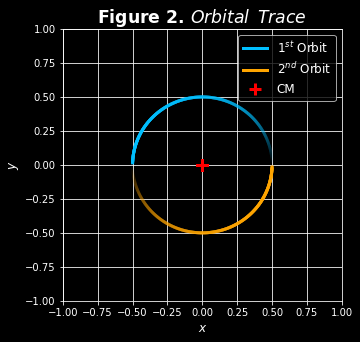

In [6]:
# set initial conditions
y = [0.5, 0., 0., 1/np.sqrt(2),   # [x_1, v_x_1, y_1, v_y_1
     -0.5, 0., 0., -1/np.sqrt(2)] #  x_2, v_x_2, y_2, v_y_2]
tmax = 2.2
simulate(tmax, y, f, simnum=2)

As we can see, with these initial conditions, the binaries follow a circular orbit, about a barycenter at the origin, for roughly half an orbital period.

## 4. Further Tests & Examples

To make sure our theory and code work properly, let's perform some more tests by varying some of the initial conditions. One thing we should verify is _translational invariance_, i.e. the orbital behaviour of the system should not depend on "where" the system is located. For example, if we move the starting positions of both stars the same amount and in the same direction, the trace should look similar, just no longer centered about the origin.

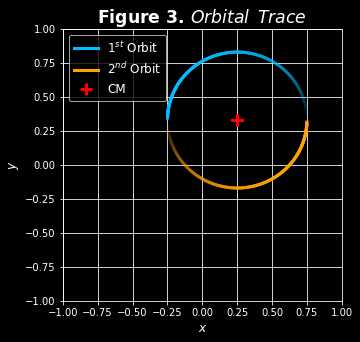

In [7]:
# move initial positions up and to the right
y = [0.75, 0., 0.33, 1/np.sqrt(2),   # [x_1, v_x_1, y_1, v_y_1
     -0.25, 0., 0.33, -1/np.sqrt(2)] #  x_2, v_x_2, y_2, v_y_2]
tmax = 2.2
simulate(tmax, y, f, simnum=3)

Good. As expected, we find the barycenter has moved in accordance with our translation.

Next, we can observe how changing the initial velocities and initial positions relative to each other affects their orbital evolution.

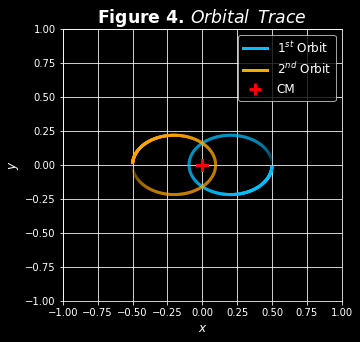

In [8]:
# decrease initial velocities
y = [0.5, 0., 0., 0.4,   # [x_1, v_x_1, y_1, v_y_1
     -0.5, 0., 0., -0.4] #  x_2, v_x_2, y_2, v_y_2]
tmax = 2
simulate(tmax, y, f, simnum=4)

By decreasing the velocity, their orbits become more eccentric.

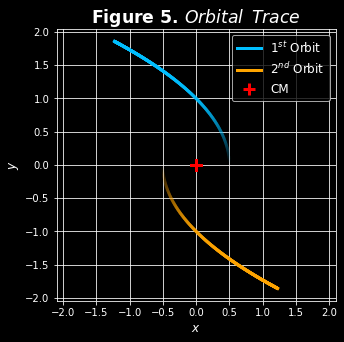

In [9]:
# increase initial velocities
y = [0.5, 0., 0., 1.,   # [x_1, v_x_1, y_1, v_y_1
     -0.5, 0., 0., -1.] #  x_2, v_x_2, y_2, v_y_2]
tmax = 4
simulate(tmax, y, f, simnum=5, zoom=False)

Here we find initial velocities of 1 cause the orbits to become unbound, i.e., an eccentricity $e > 1$.

Finally, we can run our original setup (i.e., circular orbits) for roughly 100 orbits to verify the stabilitiy and accuracy of our `rk4` method. Since, depending on the timestep, this can take a very long time to integrate, we should get a better handle of the actual orbital period and increase the timestep size accordingly to recover some vital computational time. For a binary system, from  Kepler's _third law_,

\begin{equation}
T = 2\pi\sqrt{\dfrac{a^3}{G(M_1 + M_2)}},
\end{equation}

where $a$ here is the _sum_ of the semi-major axes. For our circular binary system, $a = 1$, and, since $GM_i = 1, i=1,2$, also $G(M_1 + M_2) = GM_1 + GM_2 = 2$. Thus,

\begin{equation}
T = \dfrac{2\pi}{\sqrt2},
\end{equation}

For circular orbits, $1/20^{th}$ the orbital period is a general rule of thumb for a minimum timestep size.

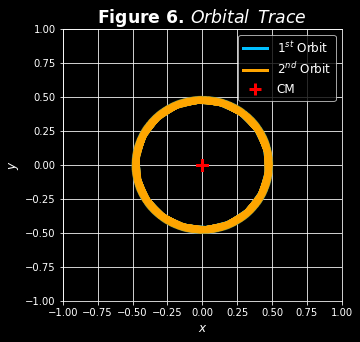

In [10]:
y = [0.5, 0., 0., 1/np.sqrt(2),   # [x_1, v_x_1, y_1, v_y_1
     -0.5, 0., 0., -1/np.sqrt(2)] #  x_2, v_x_2, y_2, v_y_2]
a = abs(y[0]) + abs(y[4])         # sum of semi-major axes
T = 2*np.pi*np.sqrt(a**3/2)       # orbital period
tmax = T*100                      # 100 full orbits
timestep = T/20.                  # 1/20th orbital period
simulate(tmax, y, f, h=timestep, simnum=6)

Aside from the fact that the second star's trace completely overshadows the first's (since it's the last to be plotted), after 100 orbits `rk4` seems to have gotten each back to their initial positions, with little indication of error accumulation or divergence.